In [1]:
import os
os.chdir('../../')
import sys
sys.path.insert(0, './python')

In [2]:
import caffe

In [3]:
from pylab import *
%matplotlib inline

In [4]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [5]:
solver = caffe.SGDSolver('examples/mlp/mlp_solver.prototxt')

In [6]:
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (100, 1, 28, 28)),
 ('label', (100,)),
 ('ip1', (100, 20)),
 ('ip2', (100, 50)),
 ('ip3', (100, 10)),
 ('loss', ())]

In [7]:
[(k, v[0].data.shape) for k, v in solver.net.params.items()]

[('ip1', (20, 784)), ('ip2', (50, 20)), ('ip3', (10, 50))]

In [ ]:
%%time
niter = 500
test_interval = 500
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    
    train_loss[it] = solver.net.blobs['loss'].data
    
    solver.test_nets[0].forward(start='ip1')
    output[it] = solver.test_nets[0].blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['ip3'].data.argmax(1) == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

In [ ]:
solver.test_nets[0].forward()

In [ ]:
solver.test_nets[0].params['ip1'][0].data[10]

In [ ]:
solver.net.params['ip1'][0].data[10]

In [ ]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

In [8]:
with open('examples/mlp/test/WB/10-ip1-w.txt', 'ra') as file:
#    for line in file.readlines():
    for x in range(10):
        for y in range(784):
            solver.net.params['ip1'][0].data[x,y] = file.readline()
            solver.net.params['ip1'][0].data[x + 10,y] = solver.net.params['ip1'][0].data[x,y]
file.close()
with open('examples/mlp/test/WB/10-ip1-b.txt', 'ra') as file:
    for x in range(10):
        solver.net.params['ip1'][1].data[x] = file.readline()
        solver.net.params['ip1'][1].data[x + 10] = solver.net.params['ip1'][1].data[x]
file.close()

In [9]:
with open('examples/mlp/test/WB/10-ip2-w.txt', 'ra') as file:
#    for line in file.readlines():
    for x in range(10):
        for y in range(10):
            solver.net.params['ip2'][0].data[x,y] = file.readline()
            for z in range(2):
                for w in range(5):
                    solver.net.params['ip2'][0].data[(w * 10) + x, (z * 10) + y] = solver.net.params['ip2'][0].data[x,y]
            
file.close()
with open('examples/mlp/test/WB/10-ip2-b.txt', 'ra') as file:
    for x in range(10):
        solver.net.params['ip2'][1].data[x] = file.readline()
        for z in range(5):
            solver.net.params['ip2'][1].data[(z * 10) + x] = solver.net.params['ip2'][1].data[x]
file.close()

In [10]:
with open('examples/mlp/test/WB/10-ip3-w.txt', 'ra') as file:
#    for line in file.readlines():
    for x in range(10):
        for y in range(10):
            solver.net.params['ip3'][0].data[x,y] = file.readline()
            for z in range(5):
                solver.net.params['ip3'][0].data[x, (z * 10) + y] = solver.net.params['ip3'][0].data[x,y]
file.close()
with open('examples/mlp/test/WB/10-ip3-b.txt', 'ra') as file:
    for x in range(10):
        solver.net.params['ip3'][1].data[x] = file.readline()
file.close()

In [ ]:
solver.net.params['ip1'][0].data

In [ ]:
solver.net.params['ip1'][1].data

In [11]:
solver.net.forward()

{'loss': array(1.0250978469848633, dtype=float32)}

In [21]:
solver.test_nets[0].forward()

{'accuracy': array(0.9300000071525574, dtype=float32),
 'loss': array(0.20491176843643188, dtype=float32)}

In [22]:
%%time
niter = 50000
test_interval = 500
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    
    train_loss[it] = solver.net.blobs['loss'].data
    
    solver.test_nets[0].forward(start='ip1')
    output[it] = solver.test_nets[0].blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['ip3'].data.argmax(1) == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

iteration 0 testing...
iteration 500 testing...
iteration 1000 testing...
iteration 1500 testing...
iteration 2000 testing...
iteration 2500 testing...
iteration 3000 testing...
iteration 3500 testing...
iteration 4000 testing...
iteration 4500 testing...
iteration 5000 testing...
iteration 5500 testing...
iteration 6000 testing...
iteration 6500 testing...
iteration 7000 testing...
iteration 7500 testing...
iteration 8000 testing...
iteration 8500 testing...
iteration 9000 testing...
iteration 9500 testing...
iteration 10000 testing...
iteration 10500 testing...
iteration 11000 testing...
iteration 11500 testing...
iteration 12000 testing...
iteration 12500 testing...
iteration 13000 testing...
iteration 13500 testing...
iteration 14000 testing...
iteration 14500 testing...
iteration 15000 testing...
iteration 15500 testing...
iteration 16000 testing...
iteration 16500 testing...
iteration 17000 testing...
iteration 17500 testing...
iteration 18000 testing...
iteration 18500 testing..

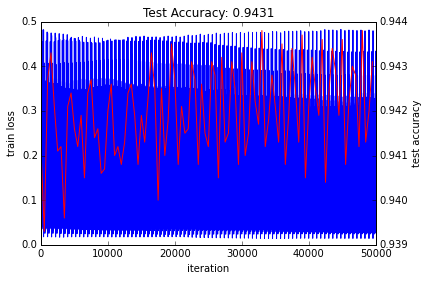

In [23]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

In [ ]:
solver.net.save('examples/mlp/mymodel.caffemodel')

In [ ]:
feat1 = solver.net.params['ip1'][0].data
feat2 = solver.net.params['ip2'][0].data
feat3 = solver.net.params['ip3'][0].data
#feat4 = solver.net.params['ip4'][0].data

std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3
#std_feat4 = feat4.std()
#mean_feat4 = feat4.mean()
#print "std_feat4 = ", std_feat4
#print "mean_feat4 = ", mean_feat4

In [ ]:
#train_net.params['ip1'][0].data[train_net.params['ip1'][0].data < (-1 * std_ip1)] = -1
#train_net.params['ip1'][0].data[train_net.params['ip1'][0].data > (1 * std_ip1)] = 1
for x in range(20):
    for y in range(784):
        if (solver.net.params['ip1'][0].data[x,y] >= (mean_feat1-std_feat1)) & (solver.net.params['ip1'][0].data[x,y] <= (mean_feat1+std_feat1)):
            solver.net.params['ip1'][0].data[x,y] = mean_feat1
#train_net.params['ip2'][0].data[train_net.params['ip2'][0].data < (-1 * std_ip2)] = -1
#train_net.params['ip2'][0].data[train_net.params['ip2'][0].data > (1 * std_ip2)] = 1
for x in range(50):
    for y in range(20):
        if (solver.net.params['ip2'][0].data[x,y] >= (mean_feat2-std_feat2)) & (solver.net.params['ip2'][0].data[x,y] <= (mean_feat2+std_feat2)):
            solver.net.params['ip2'][0].data[x,y] = mean_feat2
#train_net.params['ip3'][0].data[train_net.params['ip3'][0].data < (-1 * std_ip3)] = -1
#train_net.params['ip3'][0].data[train_net.params['ip3'][0].data > (1 * std_ip3)] = 1
for x in range(10):
    for y in range(50):
        if (solver.net.params['ip3'][0].data[x,y] >= (mean_feat3-std_feat3)) & (solver.net.params['ip3'][0].data[x,y] <= (mean_feat3+std_feat3)):
            solver.net.params['ip3'][0].data[x,y] = mean_feat3
#train_net.params['ip4'][0].data[train_net.params['ip4'][0].data < (-1 * std_ip4)] = -1
#train_net.params['ip4'][0].data[train_net.params['ip4'][0].data > (1 * std_ip4)] = 1
#for x in range(10):
#    for y in range(128):
#        if (train_net.params['ip4'][0].data[x,y] >= (-1 * std_ip4)) & (train_net.params['ip4'][0].data[x,y] <= (1 * std_ip4)):
#            train_net.params['ip4'][0].data[x,y] = 0